In [1]:
from fastai.vision import *
from fastai.distributed import *
from fastai.metrics import error_rate
from fastai.callbacks import SaveModelCallback

if torch.cuda.is_available():
  print("Great! Good to go!")
else:
  print('CUDA is not up!')

Great! Good to go!


In [2]:
from gepcore.utils import cell_graph, convolution
from gepcore.entity import Gene, Chromosome
from gepcore.symbol import PrimitiveSet
from gepnet.model import get_gepnet, arch_config
from gepnet.utils import count_parameters
torch.backends.cudnn.benchmark = True

In [3]:
from pygraphviz import AGraph
import glob

In [4]:
# get chromosme from file
graph = [AGraph(g) for g in glob.glob('nb_graphs/rs/*.dot')]
_, comp_graph = cell_graph.generate_comp_graph(graph)

In [ ]:
# generate new chromosome
# define primitive set
pset = PrimitiveSet('cnn')

# add cellular encoding program symbols
pset.add_program_symbol(cell_graph.end)
pset.add_program_symbol(cell_graph.seq)
pset.add_program_symbol(cell_graph.cpo)
pset.add_program_symbol(cell_graph.cpi)

# add convolutional operations symbols
conv_symbol = convolution.get_symbol()
pset.add_cell_symbol(conv_symbol.conv1x1)
pset.add_cell_symbol(conv_symbol.conv3x3)
pset.add_cell_symbol(conv_symbol.dwconv3x3)
pset.add_cell_symbol(conv_symbol.conv1x3)
pset.add_cell_symbol(conv_symbol.conv3x1)
#pset.add_cell_symbol(conv_symbol.maxpool3x3)

def gene_gen():
    return Gene(pset, 2)

ch = Chromosome(gene_gen, 3)
graph, comp_graph = cell_graph.generate_comp_graph(ch)

cell_graph.save_graph(graph, 'nb_graphs/rs')
cell_graph.draw_graph(graph, 'nb_graphs/rs')

In [5]:
# import random
# seed = 221
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# torch.cuda.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)

# enable torch backends
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True
#torch.backends.deterministic = True

In [6]:
conf = arch_config(comp_graph=comp_graph,
                   depth_coeff=1.0,
                   width_coeff=1.0,
                   channels=32,
                   repeat_list=[3, 2, 1, 1],
                   classes=45)

net = get_gepnet(conf)
count_parameters(net)

5.100877

In [7]:
path = Path("/home/cliff/NWPU-RESISC45")
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

bs = 64
data = (ImageList.from_folder(path/'train')
        .split_by_rand_pct(valid_pct=0.1) 
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch(bs=bs, num_workers=num_cpus())
        .normalize())

In [8]:
model_dir = '/home/cliff/ResearchProjects/models/random_search/'
learn = Learner(data, net, metrics=[error_rate, accuracy], model_dir=model_dir).mixup()
learn.to_fp16()

Learner(data=ImageDataBunch;

Train: LabelList (24300 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
forest,forest,forest,forest,forest
Path: /home/cliff/NWPU-RESISC45/train;

Valid: LabelList (2700 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ground_track_field,wetland,industrial_area,island,wetland
Path: /home/cliff/NWPU-RESISC45/train;

Test: None, model=GepNet(
  (stem): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): AvgPool2d(kernel_size=3, stride=2, padding=0)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


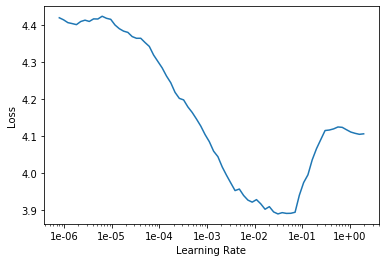

In [9]:
learn.lr_find(end_lr=100)

learn.recorder.plot()

In [ ]:
cb = SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model_1')
learn.fit_one_cycle(400, 1e-2, wd=0.0004, callbacks=[cb]) 

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.439584,1.680075,0.474815,0.525185,01:35
1,2.107430,1.367144,0.400000,0.600000,01:35
2,1.985620,1.130047,0.321481,0.678519,01:35
3,1.794244,0.959966,0.278148,0.721852,01:36
4,1.744379,0.917023,0.272963,0.727037,01:36
5,1.623210,0.781989,0.227407,0.772593,01:36
6,1.591066,0.729900,0.213333,0.786667,01:39
7,1.534815,0.698907,0.198519,0.801481,01:36
8,1.487468,0.708731,0.194444,0.805556,01:35
9,1.437526,0.615955,0.170000,0.830000,01:35


Better model found at epoch 0 with accuracy value: 0.5251851677894592.
Better model found at epoch 1 with accuracy value: 0.6000000238418579.
Better model found at epoch 2 with accuracy value: 0.678518533706665.
Better model found at epoch 3 with accuracy value: 0.7218518257141113.
Better model found at epoch 4 with accuracy value: 0.7270370125770569.
Better model found at epoch 5 with accuracy value: 0.7725926041603088.
Better model found at epoch 6 with accuracy value: 0.7866666913032532.
Better model found at epoch 7 with accuracy value: 0.8014814853668213.
Better model found at epoch 8 with accuracy value: 0.8055555820465088.
Better model found at epoch 9 with accuracy value: 0.8299999833106995.
Better model found at epoch 11 with accuracy value: 0.830740749835968.
Better model found at epoch 12 with accuracy value: 0.8392592668533325.
Better model found at epoch 13 with accuracy value: 0.8533333539962769.
Better model found at epoch 14 with accuracy value: 0.8644444346427917.
Bett

In [ ]:
#####################  Testing  ########################

In [ ]:
graph = [AGraph(g) for g in glob.glob('nb_graphs/rs/*.dot')]
_, comp_graph = cell_graph.generate_comp_graph(graph)

In [ ]:
conf = arch_config(comp_graph=comp_graph,
                   depth_coeff=1.0,
                   width_coeff=1.0,
                   channels=32,
                   repeat_list=[3, 2, 1, 1],
                   classes=45)

net = get_gepnet(conf)
count_parameters(net)

In [ ]:
tfms = get_transforms(do_flip=False)
path = Path("/home/cliff/NWPU-RESISC45")

bs = 64

data = (ImageList.from_folder(path)
        .split_by_folder(train='train', valid='test')
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch(bs=bs, num_workers=num_cpus())
        .normalize())

In [ ]:
model_dir = '/home/cliff/ResearchProjects/models/random_search/'
model = Learner(data, net, metrics=[accuracy, error_rate]).load(model_dir+'model_0')
_, acc, err = model.validate()
print('Accuracy: %.2f | Error: %.2f' %(acc.item()*100, err.item()*100))

In [ ]:
model.validate(data.valid_dl)

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(10,5), heatmap=False)

In [ ]:
interp.plot_confusion_matrix(figsize=(8,6), dpi=65)

In [ ]:
#preds,y,losses = model.get_preds(ds_type=DatasetType.Valid, with_loss=True)
#preds[:5]

In [ ]:
import pickle

In [ ]:
with open('comp_graphs/experiment_1/best/stats.pkl', 'rb') as f:
    stats = pickle.load(f)

In [ ]:
print(stats)